# Chicago Real Estate Data Analysis
This notebook provides an analysis of the Chicago real estate data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

In [2]:
# Load the data
file_path = 'real_estate_data_chicago.csv'
df = pd.read_csv(file_path)
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


## Data Cleaning
Handle missing values and correct data types.

In [3]:
# Data Cleaning
# Convert 'soldOn' to datetime
df['soldOn'] = pd.to_datetime(df['soldOn'], errors='coerce')

# Fill missing values
df['lastSoldPrice'].fillna(0, inplace=True)
df['soldOn'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
df['garage'].fillna(0, inplace=True)
df['baths_half'].fillna(0, inplace=True)

# Convert data types
df['garage'] = df['garage'].astype(int)
df['baths_half'] = df['baths_half'].astype(int)
df['lastSoldPrice'] = df['lastSoldPrice'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   type           2000 non-null   object        
 1   text           1992 non-null   object        
 2   year_built     1790 non-null   float64       
 3   beds           1940 non-null   float64       
 4   baths          1999 non-null   float64       
 5   baths_full     1937 non-null   float64       
 6   baths_half     2000 non-null   int64         
 7   garage         2000 non-null   int64         
 8   lot_sqft       992 non-null    float64       
 9   sqft           1447 non-null   float64       
 10  stories        1620 non-null   float64       
 11  lastSoldPrice  2000 non-null   float64       
 12  soldOn         2000 non-null   datetime64[ns]
 13  listPrice      1994 non-null   float64       
 14  status         2000 non-null   object        
dtypes: datetime64[ns](1),

## Exploratory Data Analysis (EDA)
Generate summary statistics and visualizations to understand the data.

In [4]:
# Summary statistics
df.describe()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
count,1790.000000,1940.00000,1999.00000,1937.000000,2000.000000,2000.00000,9.920000e+02,1447.000000,1620.000000,2.000000e+03,2000,1.994000e+03
mean,1946.050838,3.28866,2.43972,2.155911,0.352000,1.36650,7.156209e+03,2069.910159,7.183951,2.607269e+05,1998-05-13 08:36:57.600000128,6.012279e+05
min,1856.000000,0.00000,0.00000,1.000000,0.000000,0.00000,1.000000e+00,372.000000,1.000000,0.000000e+00,1970-01-01 00:00:00,1.500000e+02
25%,1916.000000,2.00000,2.00000,1.000000,0.000000,0.00000,3.125000e+03,1170.000000,2.000000,0.000000e+00,1970-01-01 00:00:00,2.250000e+05
50%,1943.000000,3.00000,2.00000,2.000000,0.000000,1.00000,3.750000e+03,1550.000000,2.000000,1.315000e+05,2004-10-13 12:00:00,3.499000e+05
75%,1970.750000,4.00000,3.00000,3.000000,1.000000,2.00000,5.013000e+03,2355.000000,4.000000,3.071250e+05,2017-06-30 00:00:00,5.750000e+05
max,2024.000000,21.00000,13.00000,8.000000,5.000000,400.00000,2.156000e+06,25000.000000,119.000000,7.500000e+06,2024-02-16 00:00:00,2.350000e+07
std,38.985904,1.75855,1.45649,1.106637,0.620716,9.15697,6.861154e+04,1691.518319,13.036822,5.442953e+05,NaN,1.202400e+06


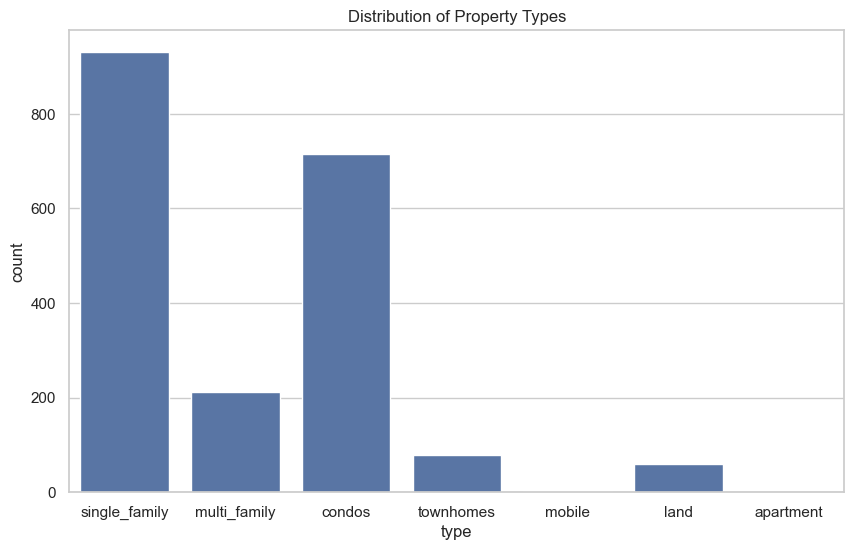

In [5]:
# Distribution of property types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Property Types')
plt.show()

/var/folders/xc/cwbvhghd70b6mkf872qsn9nw0000gn/T/ipykernel_29191/3991136940.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year_built', y='listPrice', ci=None)


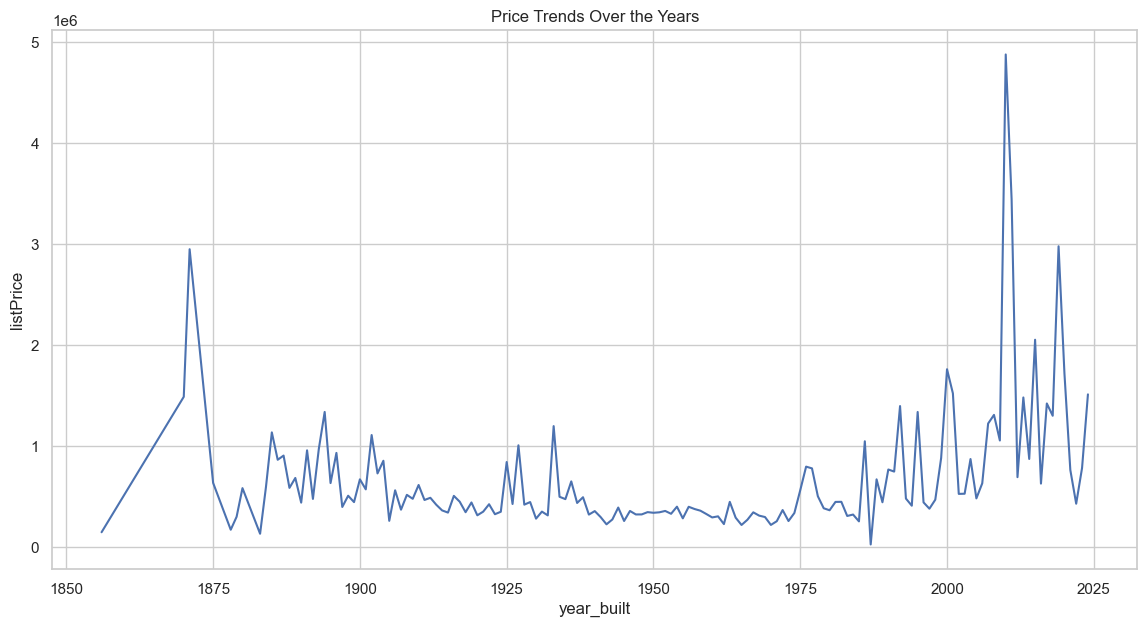

In [6]:
# Price trends over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year_built', y='listPrice', ci=None)
plt.title('Price Trends Over the Years')
plt.show()

## Feature Engineering
Create new features that might be useful for analysis.

In [7]:
# Feature Engineering
# Example: Create a new feature 'age' of the property
df['age'] = 2023 - df['year_built']
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status,age
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1,1,5615.0,3000.0,2.0,0.0,1970-01-01,750000.0,for_sale,72.0
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1,2,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale,101.0
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,0,3,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale,76.0
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1,2,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale,78.0
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2,2,8476.0,2870.0,3.0,0.0,1970-01-01,850000.0,for_sale,116.0


## Analysis
Perform specific analyses such as price trends, distribution of property types, etc.

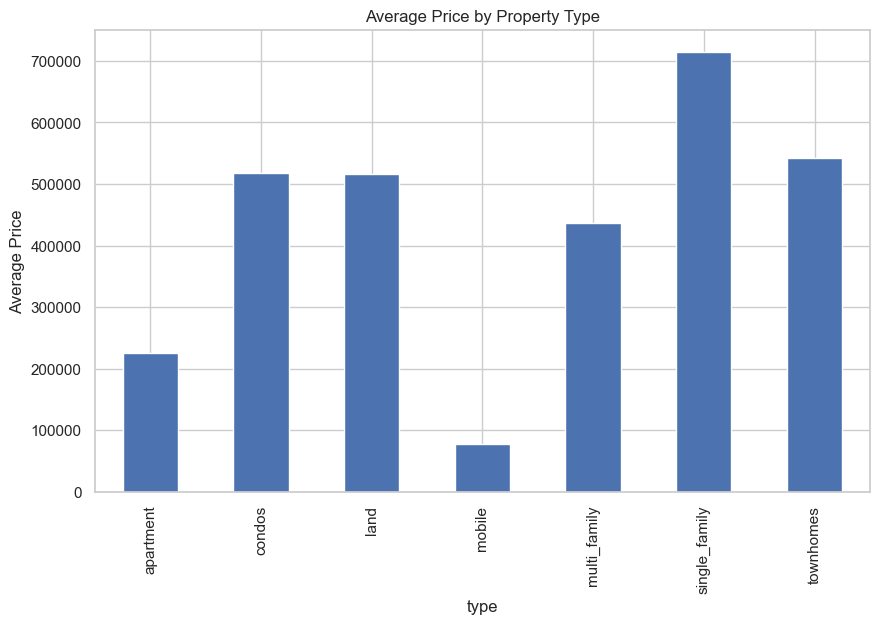

In [8]:
# Analysis
# Example: Average price by property type
avg_price_by_type = df.groupby('type')['listPrice'].mean()
avg_price_by_type.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price by Property Type')
plt.ylabel('Average Price')
plt.show()

## Conclusion
Summarize the findings and insights.

In this analysis, we explored the Chicago real estate data, performed data cleaning, and conducted exploratory data analysis. We also engineered new features and performed specific analyses to gain insights into the real estate market in Chicago.